In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', None)

# Understanding the Dataset

The Airbnb Data was obtained from a Kaggle Dataset at the following address
https://www.kaggle.com/navaneesh/airbnb#train.csv


The data provided is in the form of CSV files and are listed below: 

i.	train.csv: The training set of users 

ii.	test.csv: The test set of users. 

We are going to understand the Train dataset the Test is going to be used to test the algorithm for prediction later



In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [6]:
train['dtype'] = "train"
test['dtype'] = "test"
abnb_data = pd.concat([train,test], axis = 0,sort=False)
abnb_data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,dtype
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,train
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,train
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,train
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,train
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,train


In [7]:
abnb_data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'dtype'],
      dtype='object')

In [8]:
abnb_data.drop('thumbnail_url',axis = 1,inplace=True)
abnb_data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds', 'dtype'],
      dtype='object')

In [9]:
abnb_data.shape

(99569, 29)

In [10]:
abnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99569 entries, 0 to 25457
Data columns (total 29 columns):
id                        99569 non-null int64
log_price                 74111 non-null float64
property_type             99569 non-null object
room_type                 99569 non-null object
amenities                 99569 non-null object
accommodates              99569 non-null int64
bathrooms                 99290 non-null float64
bed_type                  99569 non-null object
cancellation_policy       99569 non-null object
cleaning_fee              99569 non-null bool
city                      99569 non-null object
description               99555 non-null object
first_review              78269 non-null object
host_has_profile_pic      99326 non-null object
host_identity_verified    99326 non-null object
host_response_rate        74964 non-null object
host_since                99326 non-null object
instant_bookable          99569 non-null object
last_review               783

    Now we calculate the percentage of missing values of various columns

In [11]:
na_train = (abnb_data.isnull().sum() / len(abnb_data)) * 100
na_train = na_train.drop(na_train[na_train == 0].index)
na_train = na_train.sort_values(ascending=False)
na_train = pd.DataFrame({'NAN Values percent' :na_train})
na_train


,NAN Values percent
log_price,25.568199
host_response_rate,24.711507
review_scores_rating,22.536131
first_review,21.392200
last_review,21.343993
neighbourhood,9.377417
zipcode,1.292571
bathrooms,0.280208
host_since,0.244052
host_identity_verified,0.244052


In [12]:
%matplotlib inline
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_plot = abnb_data.select_dtypes(include=numerics)

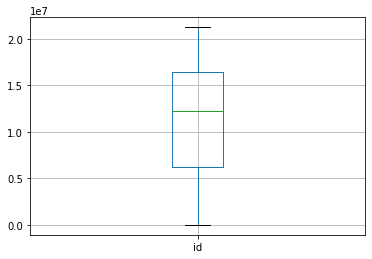

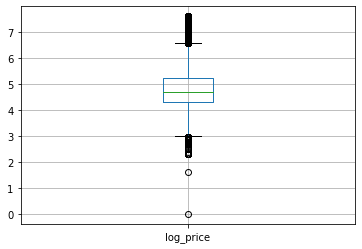

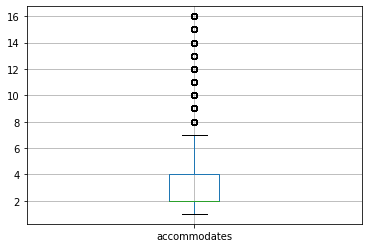

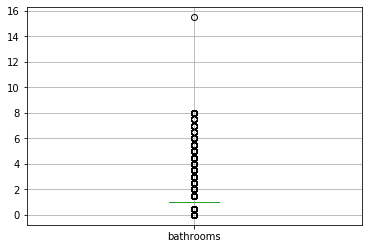

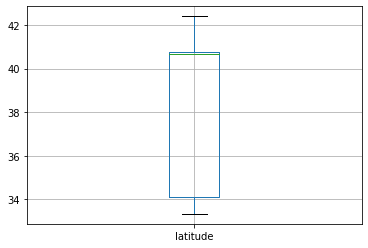

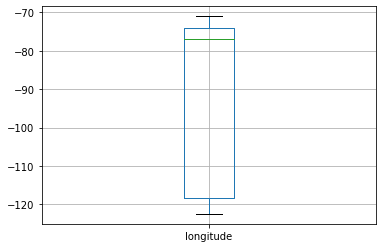

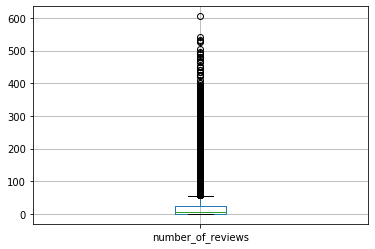

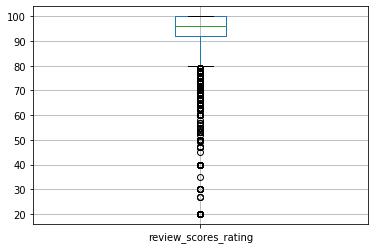

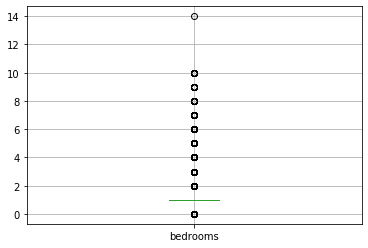

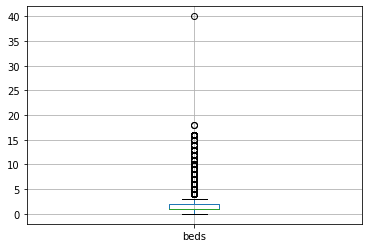

In [13]:
for column in train_plot:
    plt.figure()
    train_plot.boxplot([column])

In [14]:
Q1 = train_plot.quantile(0.25)
Q3 = train_plot.quantile(0.75)
IQR = Q3 - Q1
outliers = (train_plot < (Q1 - 1.5 * IQR)) |(train_plot > (Q3 + 1.5 * IQR))
outliers

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
25453,False,False,False,True,False,False,False,False,True,True
25454,False,False,False,True,False,False,False,False,False,False
25455,False,False,False,False,False,False,False,False,False,False
25456,False,False,False,False,False,False,False,False,False,False


In [16]:
abnb_data_wooutlier = train_plot[~((train_plot < (Q1 - 1.5 * IQR)) |(train_plot > (Q3 + 1.5 * IQR))).any(axis=1)]
abnb_data_wooutlier

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,3,1.0,40.696524,-73.991617,2,100.0,1.0,1.0
2,7919400,4.976734,5,1.0,40.808110,-73.943756,10,92.0,1.0,3.0
5,12422935,4.442651,2,1.0,37.753164,-122.429526,3,100.0,1.0,1.0
6,11825529,4.418841,3,1.0,33.980454,-118.462821,15,97.0,1.0,1.0
7,13971273,4.787492,2,1.0,34.046737,-118.260439,9,93.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
25448,17608899,NaN,1,1.0,40.783095,-73.952144,6,93.0,1.0,1.0
25452,20637322,NaN,2,1.0,38.880296,-76.992050,0,NaN,1.0,1.0
25455,13899483,NaN,2,1.0,34.086756,-118.353835,11,95.0,1.0,1.0
25456,9939029,NaN,4,1.0,40.760537,-73.989708,0,NaN,1.0,3.0


In [17]:
abnb_data['host_has_profile_pic'] = abnb_data['host_has_profile_pic'].replace("t", 1) 
abnb_data['host_has_profile_pic'] = abnb_data['host_has_profile_pic'].replace("f", 0) 

abnb_data['host_identity_verified'] = abnb_data['host_identity_verified'].replace("t", 1) 
abnb_data['host_identity_verified'] = abnb_data['host_identity_verified'].replace("f", 0) 

abnb_data['instant_bookable'] = abnb_data['instant_bookable'].replace("t", 1) 
abnb_data['instant_bookable'] = abnb_data['instant_bookable'].replace("f", 0)

abnb_data['cleaning_fee'] = abnb_data['cleaning_fee'].astype(int)

abnb_data['host_response_rate'] = abnb_data['host_response_rate'].str.replace("%","") 

abnb_data['amenities'] = abnb_data['amenities'].str.replace("[{}]", "") 
amenity_combined = abnb_data.amenities.str.get_dummies(sep = ",")

abnb_data = pd.concat([abnb_data,amenity_combined], axis=1).drop('amenities', axis = 1)

abnb_data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,dtype,"smooth pathway to front door""","""24-hour check-in""","""Accessible-height bed""","""Accessible-height toilet""","""Air conditioning""","""Air purifier""","""BBQ grill""","""Baby bath""","""Baby monitor""","""Babysitter recommendations""","""Bath towel""","""Bathtub with shower chair""","""Beach essentials""","""Bed linens""","""Body soap""","""Buzzer/wireless intercom""","""Cable TV""","""Carbon monoxide detector""","""Changing table""","""Children’s books and toys""","""Children’s dinnerware""","""Cleaning before checkout""","""Coffee maker""","""Cooking basics""","""Disabled parking spot""","""Dishes and silverware""","""Doorman Entry""","""EV charger""","""Elevator in building""","""Ethernet connection""","""Extra pillows and blankets""","""Family/kid friendly""","""Fire extinguisher""","""Fireplace guards""","""Firm matress""","""Firm mattress""","""First aid kit""","""Fixed grab bars for shower & toilet""","""Flat","""Flat smooth pathway to front door""","""Free parking on premises""","""Free parking on street""","""Game console""","""Garden or backyard""","""Grab-rails for shower and toilet""","""Ground floor access""","""Hair dryer""","""Hand or paper towel""","""Hand soap""","""Handheld shower head""","""High chair""","""Host greets you""","""Hot tub""","""Hot water kettle""","""Hot water""","""Indoor fireplace""","""Lake access""","""Laptop friendly workspace""","""Lock on bedroom door""","""Long term stays allowed""","""Luggage dropoff allowed""","""Other pet(s)""","""Outlet covers""","""Pack ’n Play/travel crib""","""Paid parking off premises""","""Path to entrance lit at night""","""Patio or balcony""","""Pets allowed""","""Pets live on this property""","""Pocket wifi""","""Private bathroom""","""Private entrance""","""Private living room""","""Roll-in shower with chair""","""Room-darkening shades""","""Safety card""","""Self Check-In""","""Single level home""","""Ski in/Ski out""","""Smart lock""","""Smoke detector""","""Smoking allowed""","""Stair gates""","""Step-free access""","""Suitable for events""","""Table corner guards""","""Toilet paper""","""Washer / Dryer""","""Well-lit path to entrance""","""Wheelchair accessible""","""Wide clearance to bed""","""Wide clearance to shower & toilet""","""Wide clearance to shower and toilet""","""Wide doorway""","""Wide entryway""","""Wide hallway clearance""","""Window guards""","""Wireless Internet""","""translation missing: en.hosting_amenity_49""","""translation missing: en.hosting_amenity_50""",Bathtub,Beachfront,Breakfast,Cat(s),Crib,Dishwasher,Dog(s),Doorman,Dryer,Elevator,Essentials,Gym,Hangers,Heating,Internet,Iron,Keypad,Kitchen,Lockbox,Microwave,Other,Oven,Pool,Refrigerator,Shampoo,Smartlock,Stove,TV,Washer,Waterfront
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,1,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,1.0,NaN,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,train,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,1,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,0.0,100,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,train,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
categorical = ['property_type','room_type','bed_type','cancellation_policy','city']
abnb_data = pd.get_dummies(abnb_data,columns = categorical)
abnb_data.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,dtype,"smooth pathway to front door""","""24-hour check-in""","""Accessible-height bed""","""Accessible-height toilet""","""Air conditioning""","""Air purifier""","""BBQ grill""","""Baby bath""","""Baby monitor""","""Babysitter recommendations""","""Bath towel""","""Bathtub with shower chair""","""Beach essentials""","""Bed linens""","""Body soap""","""Buzzer/wireless intercom""","""Cable TV""","""Carbon monoxide detector""","""Changing table""","""Children’s books and toys""","""Children’s dinnerware""","""Cleaning before checkout""","""Coffee maker""","""Cooking basics""","""Disabled parking spot""","""Dishes and silverware""","""Doorman Entry""","""EV charger""","""Elevator in building""","""Ethernet connection""","""Extra pillows and blankets""","""Family/kid friendly""","""Fire extinguisher""","""Fireplace guards""","""Firm matress""","""Firm mattress""","""First aid kit""","""Fixed grab bars for shower & toilet""","""Flat","""Flat smooth pathway to front door""","""Free parking on premises""","""Free parking on street""","""Game console""","""Garden or backyard""","""Grab-rails for shower and toilet""","""Ground floor access""","""Hair dryer""","""Hand or paper towel""","""Hand soap""","""Handheld shower head""","""High chair""","""Host greets you""","""Hot tub""","""Hot water kettle""","""Hot water""","""Indoor fireplace""","""Lake access""","""Laptop friendly workspace""","""Lock on bedroom door""","""Long term stays allowed""","""Luggage dropoff allowed""","""Other pet(s)""","""Outlet covers""","""Pack ’n Play/travel crib""","""Paid parking off premises""","""Path to entrance lit at night""","""Patio or balcony""","""Pets allowed""","""Pets live on this property""","""Pocket wifi""","""Private bathroom""","""Private entrance""","""Private living room""","""Roll-in shower with chair""","""Room-darkening shades""","""Safety card""","""Self Check-In""","""Single level home""","""Ski in/Ski out""","""Smart lock""","""Smoke detector""","""Smoking allowed""","""Stair gates""","""Step-free access""","""Suitable for events""","""Table corner guards""","""Toilet paper""","""Washer / Dryer""","""Well-lit path to entrance""","""Wheelchair accessible""","""Wide clearance to bed""","""Wide clearance to shower & toilet""","""Wide clearance to shower and toilet""","""Wide doorway""","""Wide entryway""","""Wide hallway clearance""","""Window guards""","""Wireless Internet""","""translation missing: en.hosting_amenity_49""","""translation missing: en.hosting_amenity_50""",Bathtub,Beachfront,Breakfast,Cat(s),Crib,Dishwasher,Dog(s),Doorman,Dryer,Elevator,Essentials,Gym,Hangers,Heating,Internet,Iron,Keypad,Kitchen,Lockbox,Microwave,Other,Oven,Pool,Refrigerator,Shampoo,Smartlock,Stove,TV,Washer,Waterfront,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_poli

In [19]:
abnb_data.fillna(0,inplace=True)
abnb_data.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,dtype,"smooth pathway to front door""","""24-hour check-in""","""Accessible-height bed""","""Accessible-height toilet""","""Air conditioning""","""Air purifier""","""BBQ grill""","""Baby bath""","""Baby monitor""","""Babysitter recommendations""","""Bath towel""","""Bathtub with shower chair""","""Beach essentials""","""Bed linens""","""Body soap""","""Buzzer/wireless intercom""","""Cable TV""","""Carbon monoxide detector""","""Changing table""","""Children’s books and toys""","""Children’s dinnerware""","""Cleaning before checkout""","""Coffee maker""","""Cooking basics""","""Disabled parking spot""","""Dishes and silverware""","""Doorman Entry""","""EV charger""","""Elevator in building""","""Ethernet connection""","""Extra pillows and blankets""","""Family/kid friendly""","""Fire extinguisher""","""Fireplace guards""","""Firm matress""","""Firm mattress""","""First aid kit""","""Fixed grab bars for shower & toilet""","""Flat","""Flat smooth pathway to front door""","""Free parking on premises""","""Free parking on street""","""Game console""","""Garden or backyard""","""Grab-rails for shower and toilet""","""Ground floor access""","""Hair dryer""","""Hand or paper towel""","""Hand soap""","""Handheld shower head""","""High chair""","""Host greets you""","""Hot tub""","""Hot water kettle""","""Hot water""","""Indoor fireplace""","""Lake access""","""Laptop friendly workspace""","""Lock on bedroom door""","""Long term stays allowed""","""Luggage dropoff allowed""","""Other pet(s)""","""Outlet covers""","""Pack ’n Play/travel crib""","""Paid parking off premises""","""Path to entrance lit at night""","""Patio or balcony""","""Pets allowed""","""Pets live on this property""","""Pocket wifi""","""Private bathroom""","""Private entrance""","""Private living room""","""Roll-in shower with chair""","""Room-darkening shades""","""Safety card""","""Self Check-In""","""Single level home""","""Ski in/Ski out""","""Smart lock""","""Smoke detector""","""Smoking allowed""","""Stair gates""","""Step-free access""","""Suitable for events""","""Table corner guards""","""Toilet paper""","""Washer / Dryer""","""Well-lit path to entrance""","""Wheelchair accessible""","""Wide clearance to bed""","""Wide clearance to shower & toilet""","""Wide clearance to shower and toilet""","""Wide doorway""","""Wide entryway""","""Wide hallway clearance""","""Window guards""","""Wireless Internet""","""translation missing: en.hosting_amenity_49""","""translation missing: en.hosting_amenity_50""",Bathtub,Beachfront,Breakfast,Cat(s),Crib,Dishwasher,Dog(s),Doorman,Dryer,Elevator,Essentials,Gym,Hangers,Heating,Internet,Iron,Keypad,Kitchen,Lockbox,Microwave,Other,Oven,Pool,Refrigerator,Shampoo,Smartlock,Stove,TV,Washer,Waterfront,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_poli

In [20]:
abnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99569 entries, 0 to 25457
Columns: 208 entries, id to city_SF
dtypes: float64(9), int32(1), int64(134), object(9), uint8(55)
memory usage: 121.8+ MB


In [22]:
abnb_data.to_csv('airbnb_WrangledData.csv', index = False)